In [81]:
%matplotlib inline

In [82]:
import numpy as np
from scipy import integrate, optimize, interpolate

In [83]:
from matplotlib import pyplot as plt

In [84]:
from matplotlib import rc

In [85]:
rc('font',size=16)

In [86]:
!pwd

/home/jonahm/programming/phoebus/scripts/jupyter


In [87]:
!head -n 1 ../../build/bad_ode_state.txt

#it	r	rho	J_r	trcS	Srr	A	K


In [88]:
data = np.loadtxt('../../build/bad_ode_state.txt')

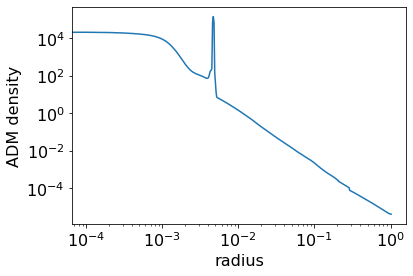

In [89]:
plt.loglog(data[:,1],data[:,2])
plt.xlabel('radius')
plt.ylabel('ADM density')
plt.savefig('rho.png')

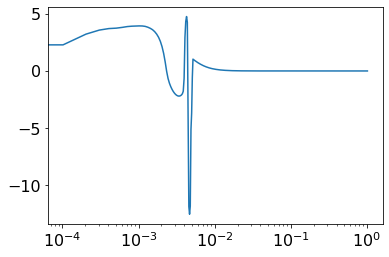

In [90]:
plt.semilogx(data[:,1],np.arcsinh(data[:,3]))

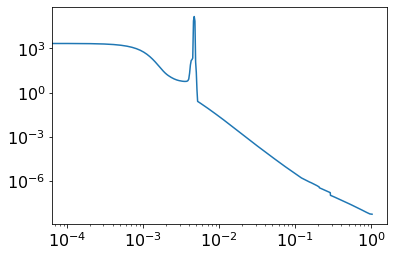

In [91]:
plt.loglog(data[:,1],data[:,4])

In [92]:
r = data[:,1]
rho_interp = interpolate.interp1d(r, data[:,2], fill_value="extrapolate")
J_interp = interpolate.interp1d(r, data[:,3], fill_value = "extrapolate")
S_interp = interpolate.interp1d(r, data[:,4], fill_value = "extrapolate")

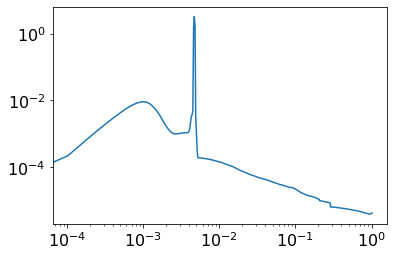

In [93]:
plt.loglog(r, rho_interp(r)*r*r)

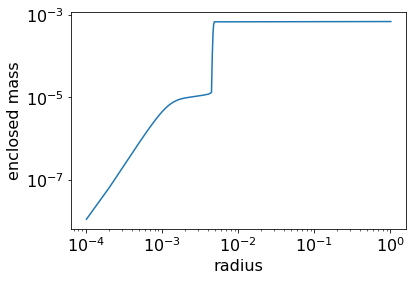

In [94]:
plt.loglog(r[1:],integrate.cumtrapz(rho_interp(r)*r*r,x=r))
plt.xlabel('radius')
plt.ylabel('enclosed mass')
plt.savefig('enclosed_mass.png')

In [95]:
def rhs(r, state):
    a = state[0]
    K = state[1]
    rho = rho_interp(r)
    J = J_interp(r)
    if r > 0:
        arhs = a * (4 + a * a * (-4 + r * r * (3 * K * K + 32 * np.pi * rho)))/(8 * r)
        #arhs = (a / (8*r))*(4 + a*a*r*r*(3*K*K+32*np.pi*rho))
        Krhs = 8 * np.pi * a * a * J - (3*K/r)
    else:
        arhs = 0.
        Krhs = 0.
    return np.array([arhs, Krhs])

In [96]:
integrator = integrate.ode(rhs)
integrator.set_integrator('dopri5')
integrator.set_initial_value(np.array([1.0,0.0]), 1e-4)

soln = np.empty((len(r),2))
soln[0] = np.array([1.0, 0.0])
for i in range(1,len(r)):
    integrator.integrate(r[i])
    soln[i] = integrator.y

/home/jonahm/anaconda3/lib/python3.9/site-packages/scipy/integrate/_ode.py:1181: UserWarning: dopri5: step size becomes too small
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,


(0.001, 0.01)

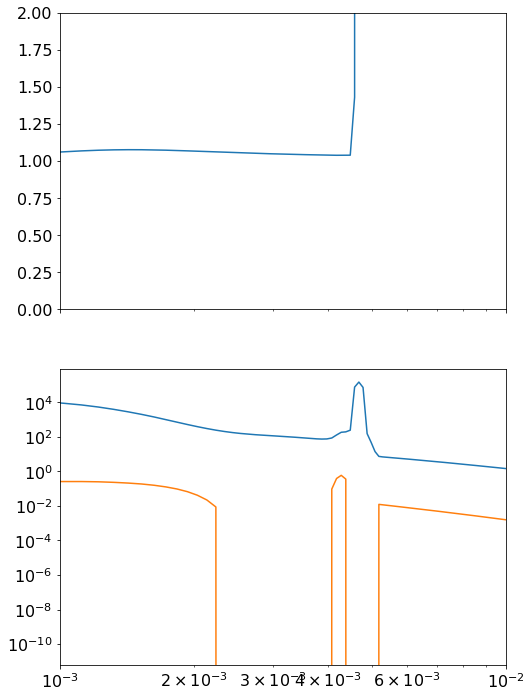

In [97]:
fig,axarr=plt.subplots(2,1,sharex=True,figsize=(8,12))

axarr[0].semilogx(r, soln[:,0])
axarr[1].loglog(r, rho_interp(r))
axarr[1].plot(r, J_interp(r)/1e2)
axarr[0].set_ylim(0,2)
axarr[0].set_xlim(1e-3,1e-2)

In [126]:
import h5py
f = h5py.File('../../build/homologous.out1.00001.phdf','r')

In [127]:
list(f.keys())

['Blocks',
 'Gcov',
 'GcovCool',
 'GcovHeat',
 'Info',
 'Input',
 'Levels',
 'Locations',
 'LogicalLocations',
 'Params',
 'VolumeLocations',
 'c.density',
 'c.energy',
 'c.momentum',
 'compweight',
 'g.c.coord',
 'g.n.coord',
 'monopole_gr::Krr',
 'monopole_gr::Srr_ADM',
 'monopole_gr::TrcS_ADM',
 'monopole_gr::a',
 'monopole_gr::alpha',
 'monopole_gr::j_ADM',
 'monopole_gr::rho_ADM',
 'p.density',
 'p.energy',
 'p.velocity',
 'p.ye',
 'pressure',
 'temperature']

In [ ]:
plt.loglog(r[:-1],f['GcovHeat'][:].reshape(10000),label='heat')
plt.loglog(r[:-1],f['GcovCool'][:].reshape(10000),label='cool')
plt.xlabel('r')
plt.ylim(1,1e40)
plt.legend()
plt.ylabel('lightbulb terms')
plt.savefig('heatcool.png')

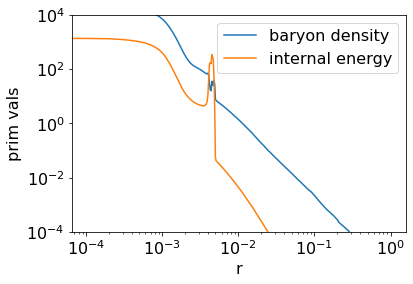

In [121]:
plt.loglog(r[:-1],f['p.density'][:].reshape(10000),label='baryon density')
plt.loglog(r[:-1],f['p.energy'][:].reshape(10000),label='internal energy')
plt.xlabel('r')
plt.ylim(1e-4,1e4)
plt.legend()
plt.legend()
plt.ylabel('prim vals')
plt.savefig('primvals.png')

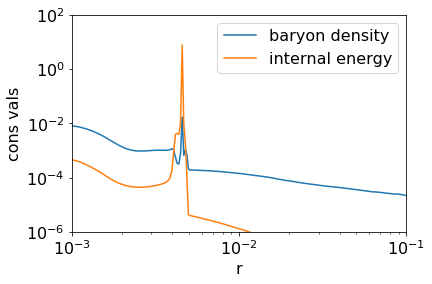

In [125]:
plt.loglog(r[:-1],f['c.density'][:].reshape(10000),label='baryon density')
plt.loglog(r[:-1],f['c.energy'][:].reshape(10000),label='internal energy')
plt.xlabel('r')
plt.ylim(1e-6,1e2)
plt.xlim(1e-3, 1e-1)
plt.legend()
plt.legend()
plt.ylabel('cons vals')
plt.savefig('consvals.png')